# Step1: Import necessary libraries

In [14]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from scipy.stats import linregress

# Step 2: Load the California Housing dataset

In [15]:
# Step 2: Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Step 3: Use a single feature for simplicity

In [16]:
# Step 3: Use a single feature for simplicity
X = df[['MedInc']]  # Use only one feature
y = df['target']

# Step 4: Split data into training and testing set

In [17]:
# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the linear regression model

In [18]:
# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Step 6: Make predictions

In [19]:
# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Fit an "actual line" using raw observed data

In [20]:
# Step 7: Fit an "actual line" using raw observed data
slope, intercept, r_value, p_value, std_err = linregress(X_test.squeeze(), y_test)
actual_line = slope * X_test.squeeze() + intercept

# Step 8: Plot the actual and predicted lines

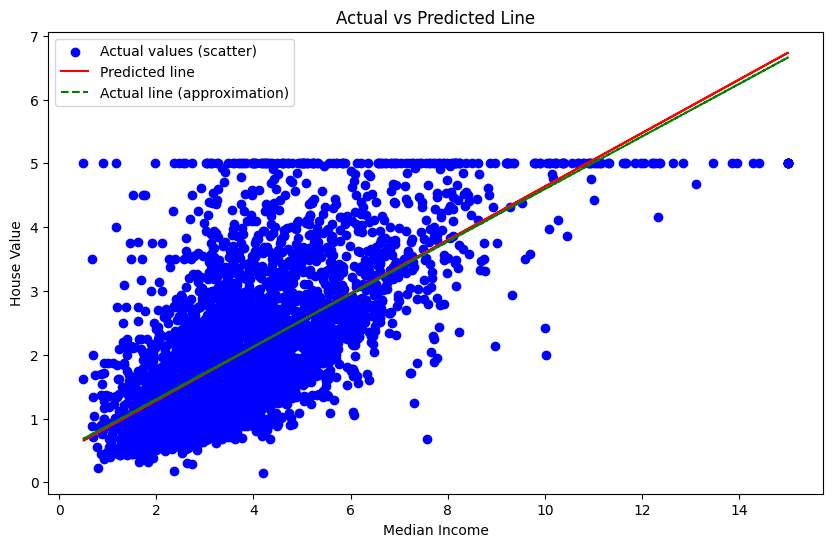

In [21]:
# Step 8: Plot the actual and predicted lines
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual values (scatter)')

# Plot the predicted regression line
plt.plot(X_test, y_pred, color='red', label='Predicted line')

# Plot the "actual line" from raw data
plt.plot(X_test, actual_line, color='green', label='Actual line (approximation)', linestyle='--')

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Actual vs Predicted Line')
plt.legend()
plt.show()

# Step 9: Compute evaluation metrics

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 9: Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the evaluation results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Model Evaluation Metrics:
Mean Absolute Error (MAE): 0.6299
Mean Squared Error (MSE): 0.7091
Root Mean Squared Error (RMSE): 0.8421
R² Score: 0.4589


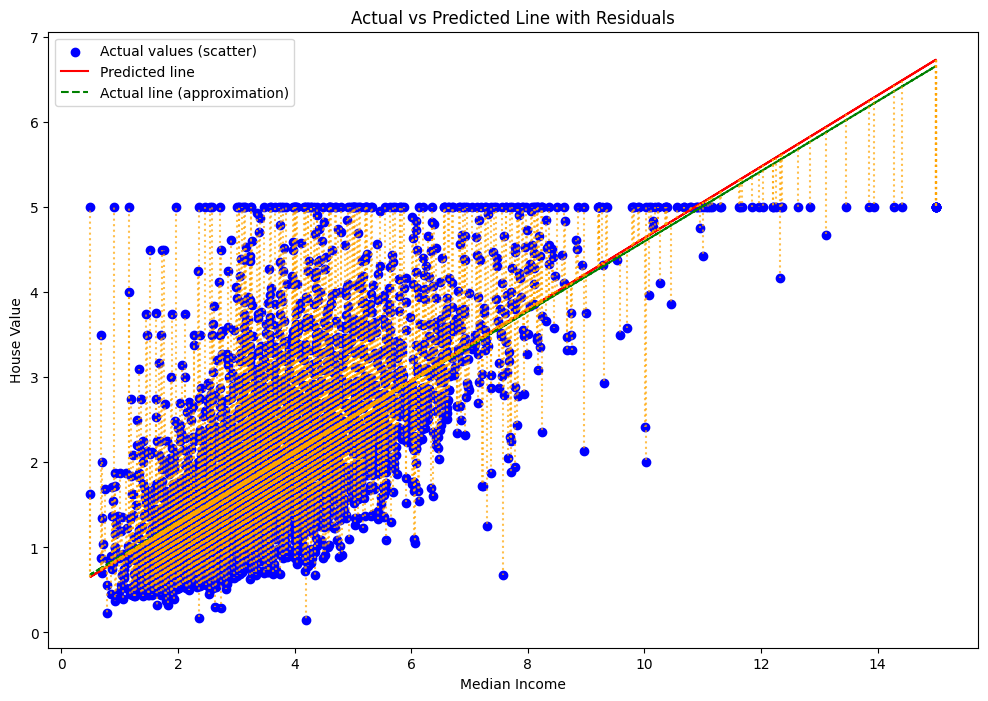

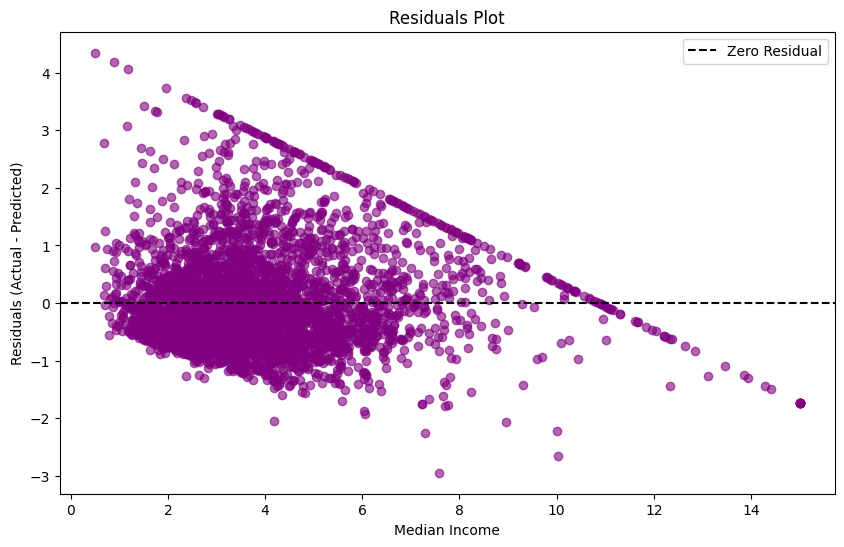

In [10]:
# Step 1-7: Keep everything as is (same code as above)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
from scipy.stats import linregress

# Step 2: Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Step 3: Use a single feature for simplicity
X = df[['MedInc']]  # Use only one feature
y = df['target']

# Step 4: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Fit an "actual line" using raw observed data
slope, intercept, r_value, p_value, std_err = linregress(X_test.squeeze(), y_test)
actual_line = slope * X_test.squeeze() + intercept

# Step 8: Calculate Residuals
residuals = y_test - y_pred

# Step 9: Plot the actual and predicted lines with residuals
plt.figure(figsize=(12, 8))

# Plot actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual values (scatter)')

# Plot the predicted regression line
plt.plot(X_test, y_pred, color='red', label='Predicted line')

# Plot the "actual line" from raw data
plt.plot(X_test, actual_line, color='green', label='Actual line (approximation)', linestyle='--')

# Highlight the residuals as vertical lines
for i in range(len(X_test)):
    plt.vlines(X_test.iloc[i], y_pred[i], y_test.iloc[i], color='orange', linestyle='dotted', alpha=0.7)

# Add labels and title
plt.xlabel('Median Income')
plt.ylabel('House Value')
plt.title('Actual vs Predicted Line with Residuals')
plt.legend()
plt.show()

# Step 10: Optional: Plot Residuals Separately
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--', label='Zero Residual')
plt.xlabel('Median Income')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals Plot')
plt.legend()
plt.show()
